In [137]:
import sys 
sys.path.append('..')
from projet_etu import *
import numpy as np 
import matplotlib as plt 
from mltools import *
from utils import *
import pickle as pkl
from loss import *
from activation import *
from sklearn.datasets import load_digits
import pandas as pd


In [138]:
X_train = pd.read_csv("../data/fashion-mnist_train.csv")
X_test = pd.read_csv("../data/fashion-mnist_test.csv")
X_train = X_train.values
X_test = X_test.values


In [139]:
X_train.shape

(60000, 785)

In [140]:
# normalize data
Y_train = X_train[:,0]
Y_test = X_test[:,0]
X_train = X_train[:,1:] / 256
X_test = X_test[:,1:] / 256





X_train[:, 1:].shape
X_train.max()

0.99609375

In [141]:
np.unique(Y_test)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

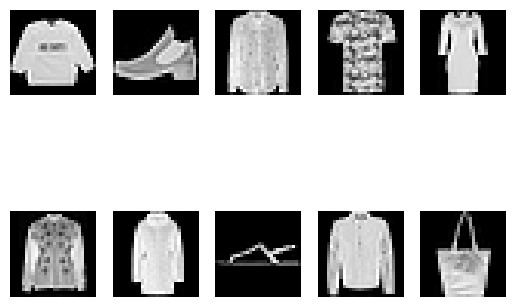

In [142]:
# affichage des images
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
plt.show()
    


In [151]:
linear1 = Linear(784, 128)
tanh = TanH()
softmax = Softmax()
sigmoid = Sigmoid()
linear2 = Linear(128, 10)
bce_loss = BCELoss()

loss_list= []
encoder = [linear1, tanh, linear2,tanh]
decoder = [Linear(10, 128), tanh, Linear(128, 784), sigmoid]
net = Sequential(encoder+decoder)


In [152]:
Lerror , Lscore = SGD(net, bce_loss,X_train, X_train, eps = 0.001 , batch_size = 50, max_iter=50)

Iteration: 0 / 10
cost  0.389
Iteration: 1 / 10
cost  0.365
Iteration: 2 / 10
cost  0.364
Iteration: 3 / 10
cost  0.345
Iteration: 4 / 10
cost  0.341
Iteration: 5 / 10
cost  0.338
Iteration: 6 / 10
cost  0.33
Iteration: 7 / 10
cost  0.336
Iteration: 8 / 10
cost  0.327
Iteration: 9 / 10
cost  0.328


In [ ]:
X_train.shape

(60000, 784)

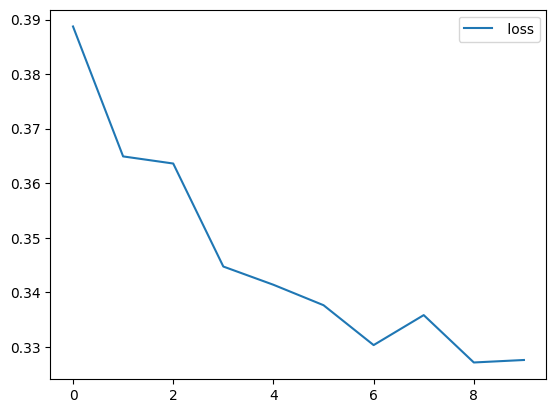

In [153]:
plt.plot(Lerror,label =' loss')
plt.legend()
plt.show()

In [154]:
one  = np.ones((X_train[0].shape[0],1))


X_train[0].shape
# put it vertically 
X_train[0].reshape(1,784).shape

(1, 784)

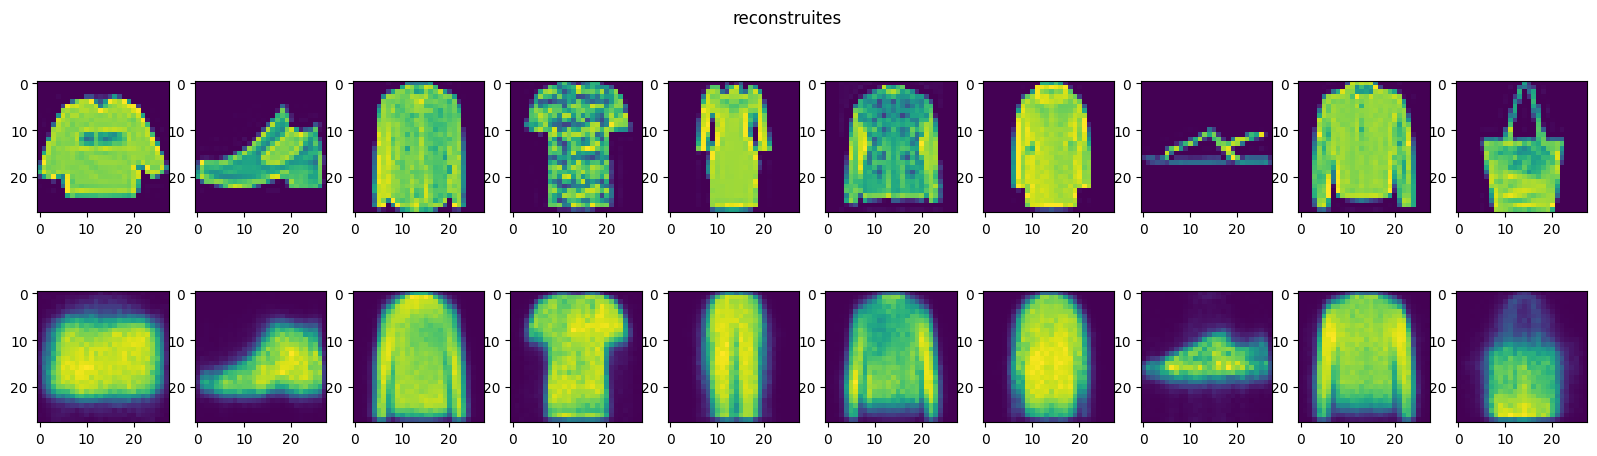

In [155]:
# affichage  des images  qui compare les images reconstruites sur chaque label 
plt.figure(figsize=(20,5))
plt.suptitle("reconstruites")
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_train[i].reshape(28,28))
    
    plt.subplot(2,10,i+11)
    
    plt.imshow(net.forward(X_train[i].reshape(1,784)).reshape(28,28))